In [9]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import random

In [34]:
M = 2 # количество скрытых состояний (честная кость/нечестная кость)
K = 6 # количество возможных наблюдаемых состояний
L = 300 # количество бросков кости
Tr = np.array([[0.95, 0.05],
               [0.1, 0.9]]) # матрица переходов
Em = np.array([[1 / 6 for i in range(6)],
               [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]]) # матрица наблюдений
pi0 = np.array([2 / 3, 1 / 3]) # начальное распределение

In [35]:
# Генерация случайной последовательности на основе Скрытой марковской модели
# Получаем последовательности скрытых состояний и наблюдений

def HMM(Tr, Em, pi0, L):
    hidden_seq = np.zeros(L, dtype=np.int)
    observation_seq = np.zeros(L, dtype=np.int)

    hidden_seq[0] = np.random.choice([0, 1], size=1, p = pi0)
    observation_seq[0] = np.random.choice([1, 2, 3, 4, 5, 6], p=Em[int(hidden_seq[0])])
    for i in range(1, L):
        hidden_seq[i] = np.random.choice([0, 1], p=Tr[int(hidden_seq[i-1])])
        observation_seq[i] = np.random.choice([1, 2, 3, 4, 5, 6], p=Em[int(hidden_seq[i-1])])
    return hidden_seq, observation_seq

hid_seq, obs_seq = HMM(Tr, Em, pi0, L)
print(hid_seq)
print(obs_seq)

[1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0
 0 0 0 0]
[6 6 6 3 4 6 5 6 3 2 5 3 6 1 6 6 4 3 6 6 4 6 4 1 4 5 2 1 2 6 1 2 2 5 6 6 6
 1 5 4 5 4 1 4 5 5 4 6 2 1 2 1 2 2 4 6 2 6 6 1 2 6 1 6 5 1 5 2 5 6 5 6 4 6
 4 6 1 6 6 6 1 4 6 6 2 4 6 6 6 6 6 6 6 1 4 4 4 6 2 2 5 3 2 4 1 5 1 5 4 4 3
 6 1 4 6 6 5 1 3 4 3 5 6 2 4 5 5 5 3 1 4 5 1 2 4 6 6 4 2 2 6 1 3 6 4 5 1 2
 4 4 4 5 6 1 5 2 4 2 2 4 1 3 3 6 3 5 3 6 6 1 6 4 2 1 3 2 4 2 1 3 3 4 3 2 2
 2 2 4 4 1 2 6 

In [36]:
# Алгоритм Витерби

V = np.zeros((L, M))
ptr = np.zeros((L, M), dtype=np.int)
V[0] = Em[:,obs_seq[0] - 1] * pi0
for i in range(1, L):
    V[i, 0] = np.log(Em[0, obs_seq[i] - 1]) + max(V[i - 1] + np.log(Tr[:, 0]))
    V[i, 1] = np.log(Em[1, obs_seq[i] - 1]) + max(V[i - 1] + np.log(Tr[:, 1]))
    ptr[i, 0] = np.argmax(V[i - 1] + np.log(Tr[:,0]))
    ptr[i, 1] = np.argmax(V[i - 1] + np.log(Tr[:,1]))
path = np.zeros(L, dtype=np.int)
path[L - 1] = np.argmax(V[L - 1])
i = L - 2    
while i != -1:
    path[i] = ptr[i + 1, path[i + 1]]
    i -= 1
print(path)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1]


<IPython.core.display.Javascript object>


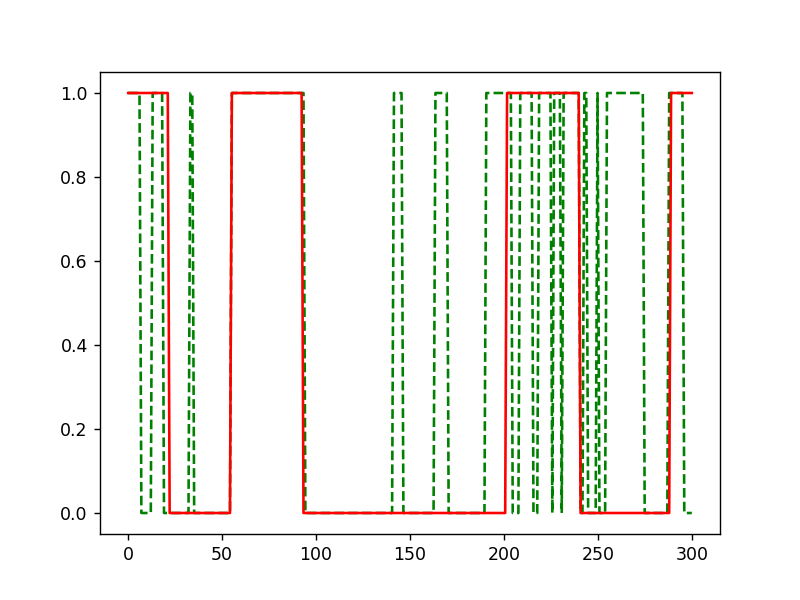

In [37]:
# зеленый - смоделированный путь, красный - путь найденный алгоритмом Витерби

x = np.linspace(0, L, L)
fig, ax = plt.subplots(1,1)
ax.plot(x, hid_seq, '--', color='g')
ax.plot(x, path, color='r')

In [40]:
#Алгоритм просмотра вперед

def forward(Tr, Em, pi0, L, observation_seq):
    f = np.zeros((L, M))
    f[0] = pi0 * Em[:,observation_seq[0] - 1]

    for i in range(1, L):
        f[i] = Em[:,(observation_seq[i]) - 1] * np.matmul(f[i - 1], Tr)

    forward_probability = f[-1][0] + f[-1][1]
    return f, forward_probability

f_k, forw_prob = forward(Tr, Em, pi0, L, obs_seq)

print(f_k)
print(forw_prob)

[[1.11111111e-001 1.66666667e-001]
 [2.03703704e-002 7.77777778e-002]
 [4.52160494e-003 3.55092593e-002]
 [1.30774177e-003 3.21844136e-003]
 [2.60699803e-004 2.96198431e-004]
 [4.62141093e-005 1.39806789e-004]
 [9.64734712e-006 1.28136816e-005]
 [1.74105799e-006 6.00734038e-006]
 [3.75789854e-007 5.49365924e-007]
 [6.86561590e-008 5.13218824e-008]
 [1.17259232e-008 4.96225022e-009]
 [1.93930868e-009 5.05232135e-010]
 [3.15477743e-010 2.75837178e-010]
 [5.45479290e-011 2.64027347e-011]
 [9.07680100e-012 1.32449289e-011]
 [1.65790897e-012 6.18713801e-012]
 [3.65621221e-013 5.65131966e-013]
 [6.73088927e-014 5.26899830e-014]
 [1.15354077e-014 2.53932147e-014]
 [2.24965980e-015 1.17153318e-014]
 [5.51451665e-016 1.06562816e-015]
 [1.05073650e-016 4.93318964e-016]
 [2.48586439e-017 4.49240750e-017]
 [4.68468654e-018 4.16745997e-018]
 [8.11199702e-019 3.98494830e-019]
 [1.35081533e-019 3.99205332e-020]
 [2.20532516e-020 4.26825565e-021]
 [3.56290244e-021 4.94409267e-022]
 [5.72366374e-022 6.

In [41]:
#Алгоритм просмотра назад

def backward(Tr, Em, pi0, L, observation_seq):
    b = np.zeros((M, L))
    b[:,-1:] = 1

    for i in range(L - 2, -1, -1):
        for j in range(M):
            b[j, i] = np.sum(Tr[j] * Em[:, (observation_seq[i + 1]) - 1] * b[:,i + 1])

    backward_probability = np.sum(pi0 * Em[:, (observation_seq[0]) - 1] * b[:,0])
    return b, backward_probability

b_k, back_prob = backward(Tr, Em, pi0, L, obs_seq)
#print(b_k)
print(back_prob)

1.284920156322648e-222


In [42]:
#Апостериорное дешифрование

P = np.zeros((L, M))

for i in range(L):
    for j in range(M):
        P[i, j] = (f_k[i, j] * b_k[j, i]) / back_prob
print(P)

[[0.11981991 0.88018009]
 [0.1015864  0.8984136 ]
 [0.12481929 0.87518071]
 [0.21796746 0.78203254]
 [0.25369094 0.74630906]
 [0.24460499 0.75539501]
 [0.30599711 0.69400289]
 [0.31754911 0.68245089]
 [0.42036187 0.57963813]
 [0.46233516 0.53766484]
 [0.45829132 0.54170868]
 [0.40680234 0.59319766]
 [0.28968551 0.71031449]
 [0.26863124 0.73136876]
 [0.19523814 0.80476186]
 [0.19099834 0.80900166]
 [0.25072021 0.74927979]
 [0.26173088 0.73826912]
 [0.22791862 0.77208138]
 [0.25824148 0.74175852]
 [0.38983009 0.61016991]
 [0.45065095 0.54934905]
 [0.66755742 0.33244258]
 [0.78698495 0.21301505]
 [0.85110784 0.14889216]
 [0.88257027 0.11742973]
 [0.89248281 0.10751719]
 [0.88434593 0.11565407]
 [0.85528621 0.14471379]
 [0.79504158 0.20495842]
 [0.81261427 0.18738573]
 [0.80310614 0.19689386]
 [0.76315952 0.23684048]
 [0.67866776 0.32133224]
 [0.51979367 0.48020633]
 [0.48617113 0.51382887]
 [0.53662901 0.46337099]
 [0.73295347 0.26704653]
 [0.84211015 0.15788985]
 [0.90264634 0.09735366]


<IPython.core.display.Javascript object>


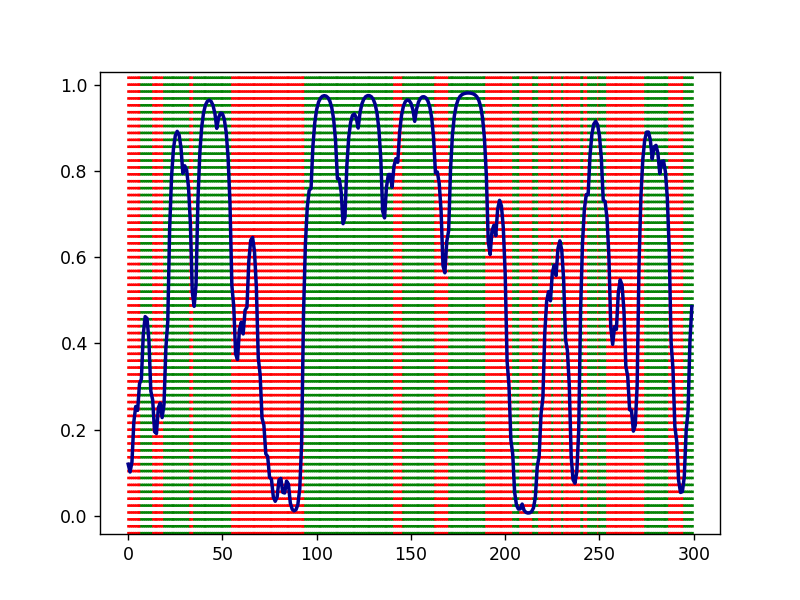

In [43]:
# График апостериорных вероятностей (синяя линия) в сравнении со смоделированным путем
# Красный участок показывает, при каких бросках использовадась неправильная кость, зеленый - правильная

for i in range(0, L):
    if hid_seq[i] == 0:
        plt.axvline(x = i, linestyle = ':', color = 'g')
    else:
        plt.axvline(x = i, linestyle = ':', color = 'r')
xx = np.arange(0, L)
plt.plot(xx, P[:,0], color = 'darkblue', linewidth = 2)

In [33]:
# Алгоритм Баума-Уэлча

# Определим случайные значения для матриц перехода и наблюдения
Tr_bw = np.array([[0.8, 0.2], 
                  [0.3, 0.7]])
Em_bw = np.array([[0.1, 0.2, 0.3, 0.1, 0.1, 0.2],
                  [0.05, 0.05, 0.1, 0.1, 0.6, 0.1]])
pi0_bw = [0.6, 0.4]

hid_seq, obs_seq = HMM(Tr_bw, Em_bw, pi0_bw, L)
f_k_bw, forw_prob_bw = forward(Tr_bw, Em_bw, pi0_bw, L, obs_seq)
b_k_bw = backward(Tr_bw, Em_bw, pi0_bw, L, obs_seq)[0]

eps = 0.001

# оценка параметров матрицы переходов
A = np.zeros((M, M))
a = np.zeros((M, M))
a_prev = np.zeros((M, M))

for i in range(M):
    for j in range(M):
        for k in range(1, L - 1):
            A[i, j] += f_k_bw[k, i] * Tr_bw[i, j] * Em_bw[j, obs_seq[k] - 1] * b_k_bw[j, k + 1]
A /= forw_prob_bw
for i in range(M):
    for j in range(M):
        a[i, j] = A[i, j] / np.sum(A[i])

def estimation(a_bw, e_bw):
    f_k_bw, forw_prob_bw = forward(a_bw, e_bw, pi0_bw, L, obs_seq)
    b_k_bw = backward(a_bw, e_bw, pi0_bw, L, obs_seq)[0]
    A = np.zeros((M, M))
    a = np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            for k in range(1, L - 1):
                A[i, j] += f_k_bw[k, i] * a_bw[i, j] * e_bw[j, obs_seq[k] - 1] * b_k_bw[j, k + 1]
    A /= forw_prob_bw
    for i in range(M):
        for j in range(M):
            a[i, j] = A[i, j] / np.sum(A[i])
    E = np.zeros((M, K))
    e = np.zeros((M, K))
    for i in range(M):
        for j in range(K):
            for k in range(0, L):
                if obs_seq[k] == j + 1:
                    E[i, j] += f_k_bw[k, i] * b_k_bw[i, k]
    for i in range(M):
        for j in range(K):
            e[i, j] = E[i, j] / np.sum(E[i])
    return a, e

while np.any(abs(a_prev - a) > eps):
    a_prev, a = a, estimation(a, Em_bw)[0]
print(a)
        
# оценка параметров матрицы наблюдений
E = np.zeros((M, K))
e = np.zeros((M, K))
e_prev = np.zeros((M, K))

for i in range(M):
    for j in range(K):
        for k in range(0, L):
            if obs_seq[k] == j + 1:
                E[i, j] += f_k_bw[k, i] * b_k_bw[i, k]
for i in range(M):
    for j in range(K):
        e[i, j] = E[i, j] / np.sum(E[i])

while np.any(abs(e_prev - e) > eps):
    e_prev, e = e, estimation(a, e)[1]
print(e)

[[0.97282263 0.02717737]
 [0.02539379 0.97460621]]
[[0.04698038 0.17803619 0.32203719 0.08068978 0.19135826 0.18089819]
 [0.04588514 0.12670601 0.01235699 0.18301672 0.55900776 0.07302737]]
